<a href="https://colab.research.google.com/github/Enesylcn/GlobalAI_ML_Regression/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Veri Yükleme ve Temizleme:**

In [6]:
import numpy as np
import pandas as pd

# Gerekli kütüphaneleri yükleme
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Veriyi yükleme
df = pd.read_csv('/ndtv_data_final.csv')
# Veri hakkında genel bilgileri inceleme
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1359 non-null   int64  
 1   Name                    1359 non-null   object 
 2   Brand                   1359 non-null   object 
 3   Model                   1359 non-null   object 
 4   Battery capacity (mAh)  1359 non-null   int64  
 5   Screen size (inches)    1359 non-null   float64
 6   Touchscreen             1359 non-null   object 
 7   Resolution x            1359 non-null   int64  
 8   Resolution y            1359 non-null   int64  
 9   Processor               1359 non-null   int64  
 10  RAM (MB)                1359 non-null   int64  
 11  Internal storage (GB)   1359 non-null   float64
 12  Rear camera             1359 non-null   float64
 13  Front camera            1359 non-null   float64
 14  Operating system        1359 non-null   

# **Veri Hazırlığı:**

In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1359.0,679.000000,392.453819,0.000,339.5,679.0,1018.5,1358.0
Battery capacity (mAh),1359.0,2938.489330,873.514133,1010.000,2300.0,3000.0,3500.0,6000.0
Screen size (inches),1359.0,5.291310,0.671357,2.400,5.0,5.2,5.7,7.3
Resolution x,1359.0,811.543046,270.707271,240.000,720.0,720.0,1080.0,2160.0
Resolution y,1359.0,1490.777778,557.780120,320.000,1280.0,1280.0,1920.0,3840.0
Processor,1359.0,5.551141,2.196562,1.000,4.0,4.0,8.0,10.0
RAM (MB),1359.0,2488.777778,1664.440386,64.000,1000.0,2000.0,3000.0,12000.0
Internal storage (GB),1359.0,30.654864,36.950241,0.064,8.0,16.0,32.0,512.0
Rear camera,1359.0,12.070199,8.948337,0.000,8.0,12.2,13.0,108.0
Front camera,1359.0,7.037969,6.295448,0.000,2.0,5.0,8.0,48.0


In [69]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [70]:
# Sayısal sütunları seçme
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
# Sayısal sütunlarla yeni bir DataFrame oluşturma
numeric_df = df[numeric_columns]
numeric_df.head()

,Unnamed: 0,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
0,0,4085,6.67,1440,3120,8,12000,256.0,48.0,16.0,2,58998
1,1,4000,6.50,1080,2400,8,6000,64.0,64.0,16.0,2,27999
2,2,3969,6.50,1242,2688,6,4000,64.0,12.0,12.0,2,106900
3,3,3110,6.10,828,1792,6,4000,64.0,12.0,12.0,2,62900
4,4,4000,6.40,1080,2340,8,6000,128.0,12.0,32.0,1,49990


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Battery capacity (mAh)'].plot(kind='hist', bins=20, title='Battery capacity (mAh)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Screen size (inches)'].plot(kind='hist', bins=20, title='Screen size (inches)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Resolution x'].plot(kind='hist', bins=20, title='Resolution x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Unnamed: 0', y='Battery capacity (mAh)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Battery capacity (mAh)', y='Screen size (inches)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Screen size (inches)', y='Resolution x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Resolution x', y='Resolution y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Battery capacity (mAh)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Battery capacity (mAh)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Screen size (inches)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Screen size (inches)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Resolution x']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Resolution x')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['Resolution y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Unnamed: 0', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('Resolution y')

from matplotlib import pyplot as plt
_df_12['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Battery capacity (mAh)'].plot(kind='line', figsize=(8, 4), title='Battery capacity (mAh)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Screen size (inches)'].plot(kind='line', figsize=(8, 4), title='Screen size (inches)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Resolution x'].plot(kind='line', figsize=(8, 4), title='Resolution x')
plt.gca().spines[['top', 'right']].set_visible(False)

# **Model Oluşturma ve Görselleştirme:**

In [81]:
# Bağımsız ve bağımlı değişkenlerin belirlenmesi
X = numeric_df.drop('Price', axis=1).values
y = numeric_df['Price'].values
X_rooms = X[:,7]
X_rooms.shape

(1359,)

In [76]:
X_rooms = X_rooms.reshape(-1,1)
X_rooms.shape

(1359, 1)

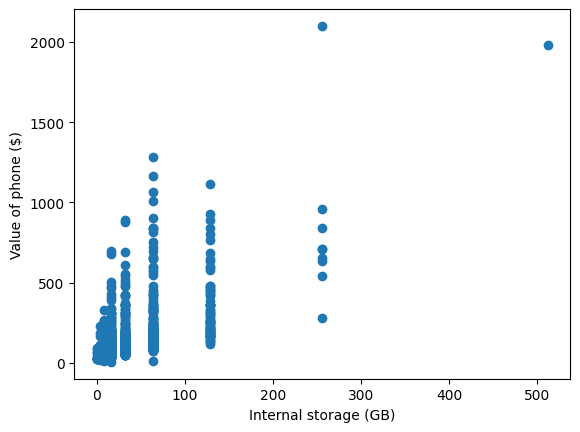

In [77]:
# "0,012" dataset'de bulunan 1 Hindistan Rupisinin, Amerikan Dolarına çevirilmesi için kullanıldı.
# Veriyi görselleştirme
plt.scatter(X_rooms, y*0.012)
plt.ylabel('Value of phone ($)')
plt.xlabel('Internal storage (GB)')
plt.show();

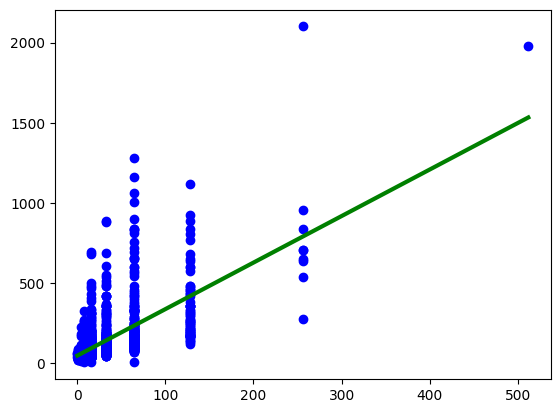

In [14]:
# Doğrusal regresyon modeli oluşturma
reg = LinearRegression()
reg.fit(X_rooms, y*0.012)
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1, 1)
# Regresyon çizgisini görselleştirme
plt.scatter(X_rooms, y*0.012, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='green', linewidth=3)
plt.show()

# **Model Eğitimi ve Değerlendirme:**

In [18]:
# Veriyi eğitim ve test setlerine ayırma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
# Tüm veri üzerinde doğrusal regresyon modeli eğitme ve değerlendirme
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

In [20]:
# Hata ölçümü
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 9496.9106666925


In [21]:
# Çapraz doğrulama ile model performansını değerlendirme
cv_results = cross_val_score(reg_all, X, y, cv=5)
print(cv_results)

[ 0.1182008  -0.11197708  0.46472417  0.11566377  0.39153383]


In [22]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

Average 5-Fold CV Score: 0.19562909754971747


# **Ridge Regresyon:**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
# Ridge regresyon modeli oluşturma ve değerlendirme
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 9495.595600013374


In [47]:
# Çapraz doğrulama ile model performansını değerlendirme
cv_results = cross_val_score(ridge, X, y, cv=8)
print(cv_results)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

[ 0.24838912 -0.01909458 -0.07040381  0.51194088  0.2586805   0.06629654
  0.35107776  0.43564906]
Average 5-Fold CV Score: 0.22281693465356714


# **Lasso Regresyon:**

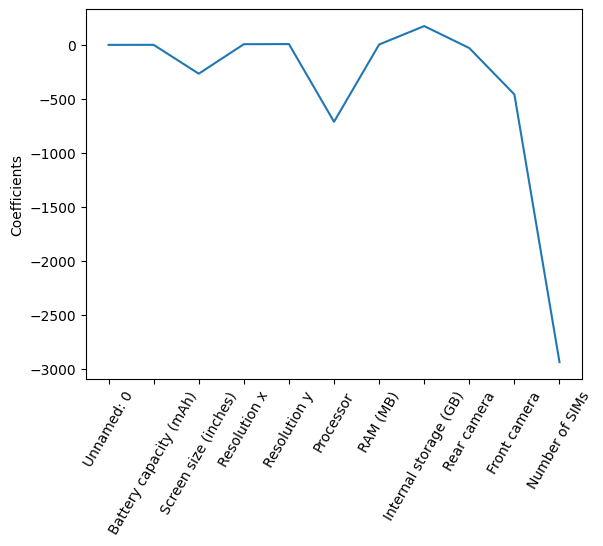

In [49]:
# Lasso regresyon modeli oluşturma ve değerlendirme
names = numeric_df.drop('Price', axis=1).columns
lasso = Lasso(alpha=0.01)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
# Modeli eğitme ve değerlendirme
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 9496.905158147243


In [52]:
# Çapraz doğrulama ile model performansını değerlendirme
cv_results = cross_val_score(lasso, X, y, cv=8)
print(cv_results)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_results)))

[ 0.24840018 -0.01880747 -0.07073763  0.51195951  0.25844402  0.06580616
  0.35116227  0.43527123]
Average 5-Fold CV Score: 0.22268728446091057


# **Grid Search ile Model Tuning:**

In [64]:
# Ridge regresyon modeli için hiperparametre optimizasyonu
alpha_space = np.linspace(0, 1, 100)
param_grid = {'alpha': alpha_space}
ridge_grid = GridSearchCV(ridge, param_grid, cv=6)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
ridge_grid.fit(X_train, y_train)
print("Tuned Ridge Regression Parameters: {} ".format(ridge_grid.best_params_))
print("Best score is {}".format(ridge_grid.best_score_))

Tuned Ridge Regression Parameters: {'alpha': 1.0} 
Best score is 0.45674225630505516


In [83]:
# Pipeline ve Lasso regresyon modeli için hiperparametre optimizasyonu
steps = [('scaler', StandardScaler()),
         ('lasso', Lasso())]
pipeline = Pipeline(steps)
parameters = {'lasso__alpha':np.linspace(0.0001,1,1000),}
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gm_cv = GridSearchCV(pipeline, param_grid=parameters, cv=6)
gm_cv.fit(X_train, y_train)
r2 = gm_cv.score(X_test, y_test)
y_pred = gm_cv.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Tuned Ridge Regression Alpha: {}".format(gm_cv.best_params_))
print("Tuned Ridge Regression squared: {}".format(r2))
print("Best Score: ", gm_cv.best_score_)
print("Best RMSE:", rmse)

Tuned Ridge Regression Alpha: {'lasso__alpha': 1.0}
Tuned Ridge Regression squared: 0.5710925022846893
Best Score:  0.4566742717757771
Best RMSE: 9496.77757351057
